In [2]:
from pathlib import Path
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
results_dir = Path("..") /  "results"
fname = results_dir / "benchmark_n-receivers.nc"

In [5]:
dataset = xr.load_dataset(fname)
dataset

<xarray.Dataset>
Dimensions:          (n_receivers: 7, simulation_type: 2, engine: 2, parallel: 2)
Coordinates:
  * n_receivers      (n_receivers) int32 100 400 900 1600 2500 3600 4900
  * simulation_type  (simulation_type) object 'ram' 'forward_only'
  * engine           (engine) object 'geoana' 'choclo'
  * parallel         (parallel) bool False True
Data variables:
    times            (parallel, simulation_type, engine, n_receivers) float64 ...
    errors           (parallel, simulation_type, engine, n_receivers) float64 ...

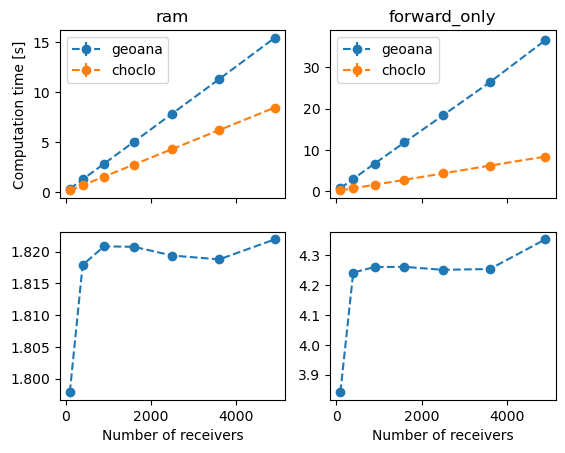

In [55]:
parallel = False

ncols, nrows = 2, 2
fix, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True)
fig.suptitle("Benchmarks: single thread")

for col, simulation_type in zip(range(ncols), dataset.simulation_type):

    # First row
    ax = axes[0, col]
    for engine in dataset.engine:
        results = dataset.sel(
            engine=engine, simulation_type=simulation_type, parallel=parallel
        )
        
        engine_str = str(engine.values)
        ax.errorbar(
            x=results.n_receivers,
            y=results.times,
            yerr=results.errors,
            marker="o",
            linestyle="dashed",
            label=engine_str,
        )
    ax.legend()
    ax.set_title(str(simulation_type.values))
    if col == 0:
        ax.set_ylabel("Computation time [s]")
    
    # Second row
    ax = axes[1, col]
    results = dataset.sel(simulation_type=simulation_type, parallel=parallel)

    relative = results.sel(engine="geoana").times / results.sel(engine="choclo").times
    
    engine_str = str(results.engine.values)
    ax.plot(
        relative.n_receivers,
        relative,
        marker="o",
        linestyle="dashed",
    )
    ax.set_xlabel("Number of receivers")

plt.show()

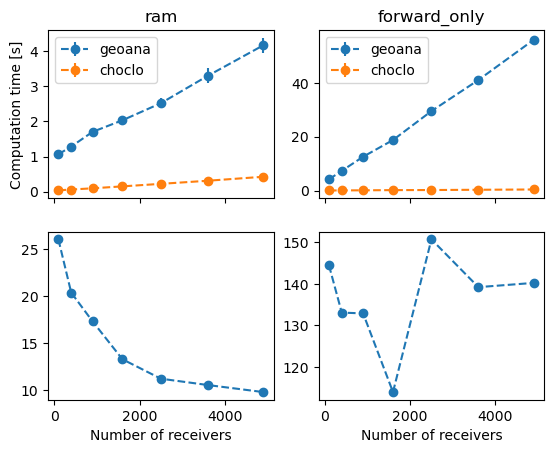

In [57]:
parallel = True

ncols, nrows = 2, 2
fix, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True)
fig.suptitle("Benchmarks: parallel")

for col, simulation_type in zip(range(ncols), dataset.simulation_type):

    # First row
    ax = axes[0, col]
    for engine in dataset.engine:
        results = dataset.sel(
            engine=engine, simulation_type=simulation_type, parallel=parallel
        )
        
        engine_str = str(engine.values)
        ax.errorbar(
            x=results.n_receivers,
            y=results.times,
            yerr=results.errors,
            marker="o",
            linestyle="dashed",
            label=engine_str,
        )
    ax.legend()
    ax.set_title(str(simulation_type.values))
    if col == 0:
        ax.set_ylabel("Computation time [s]")
    
    # Second row
    ax = axes[1, col]
    results = dataset.sel(simulation_type=simulation_type, parallel=parallel)

    relative = results.sel(engine="geoana").times / results.sel(engine="choclo").times
    
    engine_str = str(results.engine.values)
    ax.plot(
        relative.n_receivers,
        relative,
        marker="o",
        linestyle="dashed",
    )
    ax.set_xlabel("Number of receivers")

plt.show()